In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [41]:
#10 states to investigate
#! gas prices are not very relevant - depend a lot on macroeconomic factors
#! clean_coal deprecated, replicated by clean_Coal_gen file

# relevant states = highest producers + highest consumers
producers = {"Texas", "North Dakota", "Wyoming", "Pennsylvania", "Oklahoma", "West Virginia"}
consumers = {"Texas", "California", "New York", "Florida", "Ohio", "Pennsylvania"}
relevstates = list(producers.union(consumers))
len(relevstates)

10

In [42]:
genfiles = pd.Series(os.listdir("clean_data"))
genfiles = genfiles[genfiles.str.contains("_gen.csv")].values
genfiles

array(['clean_wood_gen.csv', 'clean_solar_gen.csv', 'clean_wind_gen.csv',
       'clean_nuclear_gen.csv', 'clean_biomass_gen.csv',
       'clean_hydroelectric_gen.csv', 'clean_coal_gen.csv',
       'clean_total_gen.csv', 'clean_natural gas_gen.csv'], dtype=object)

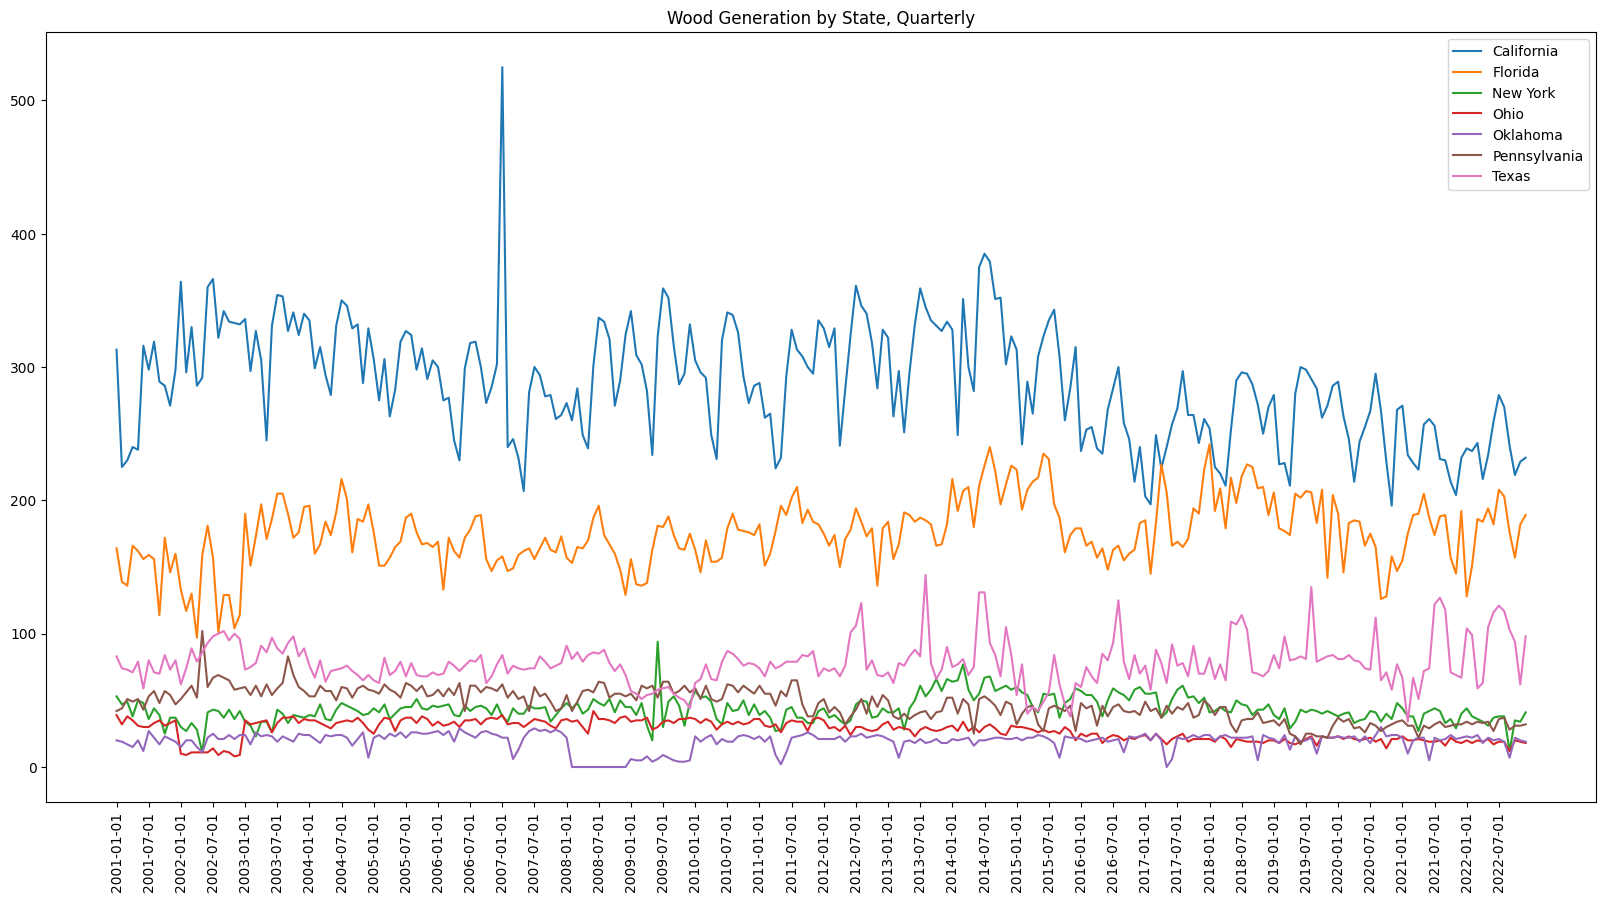

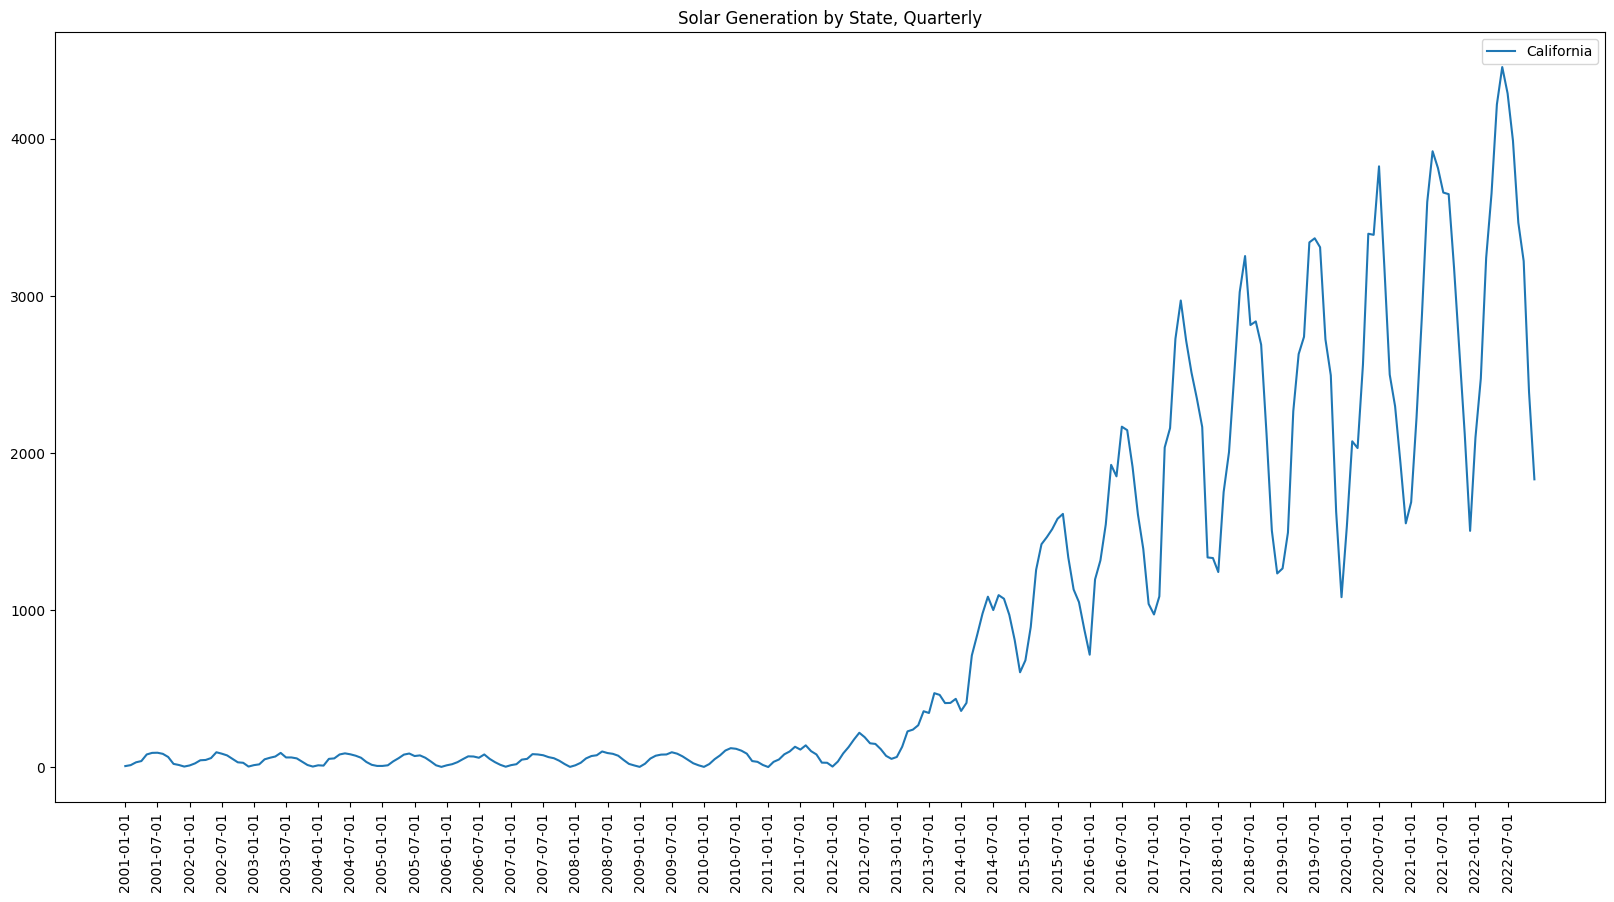

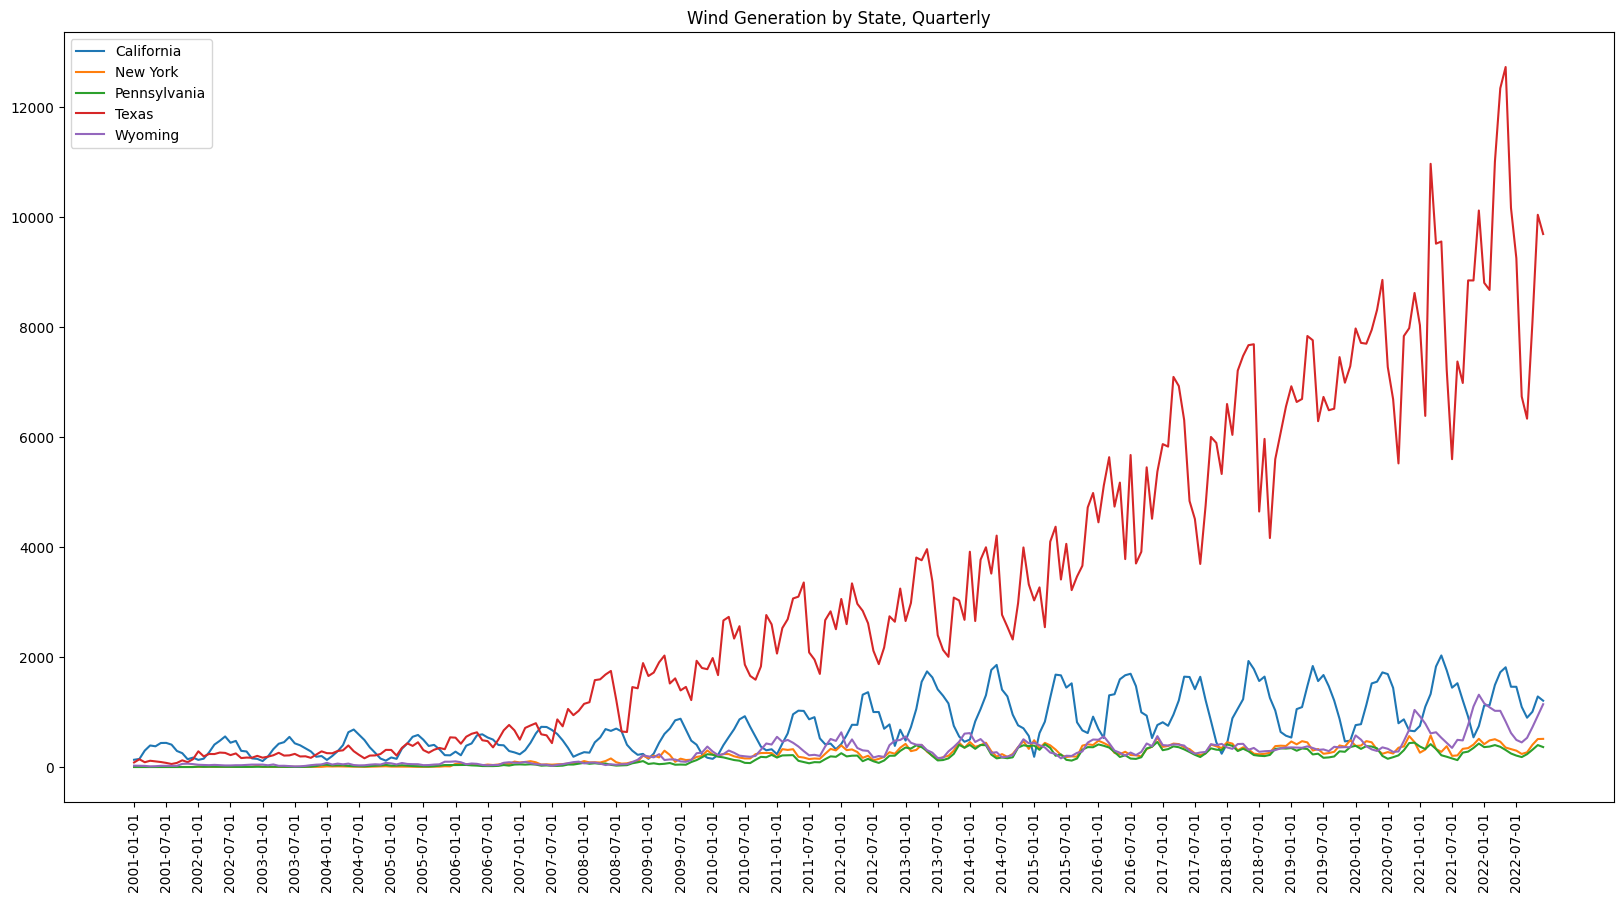

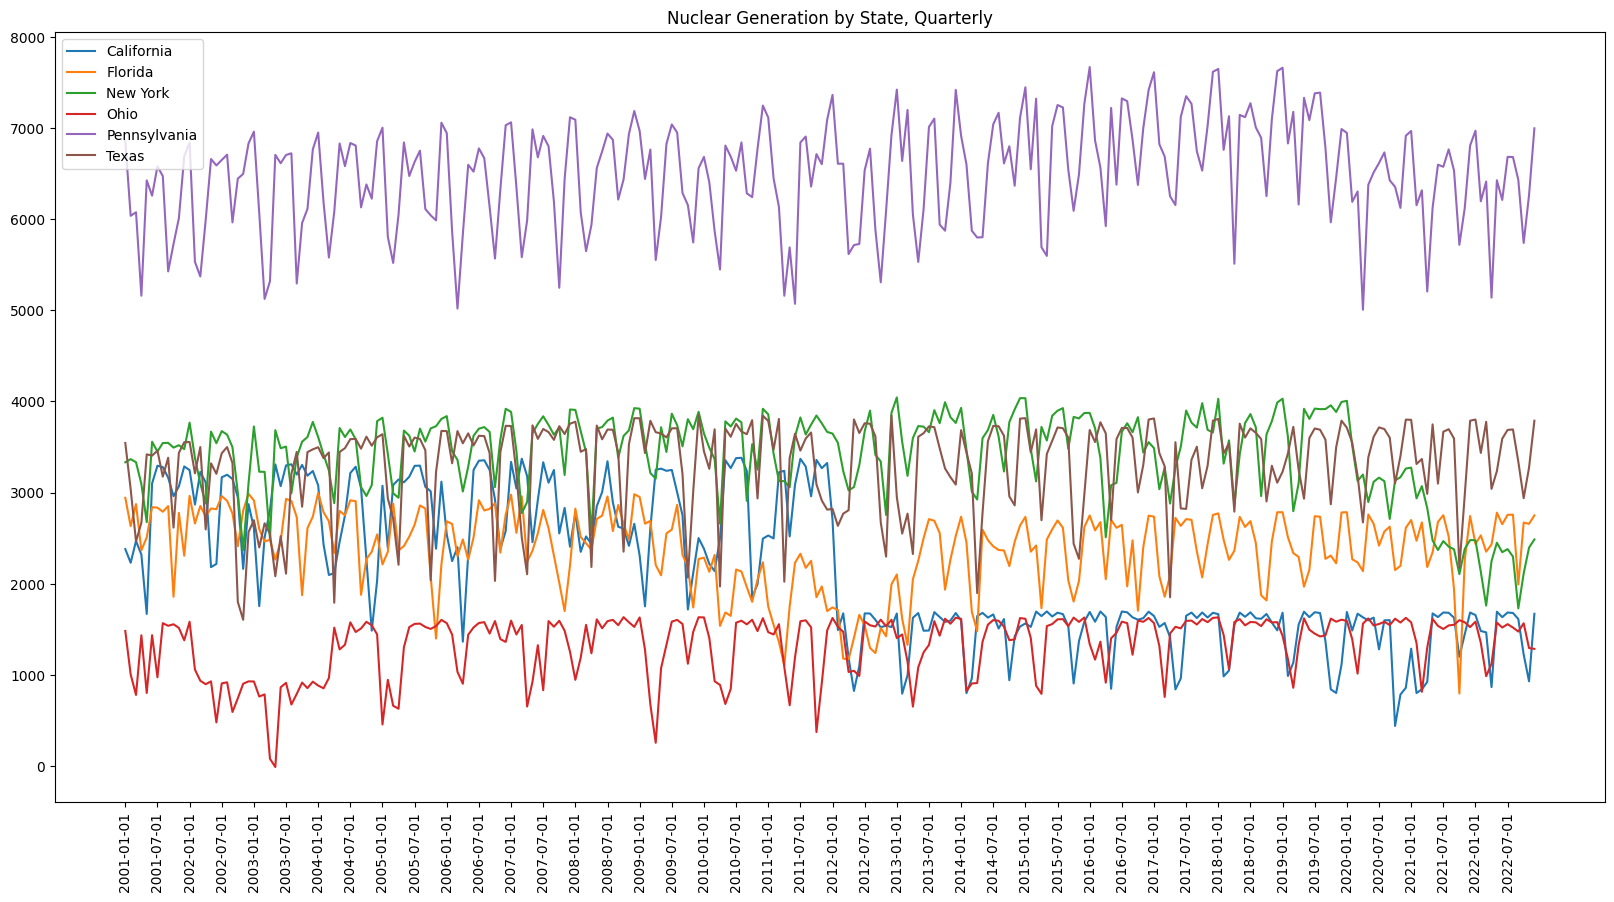

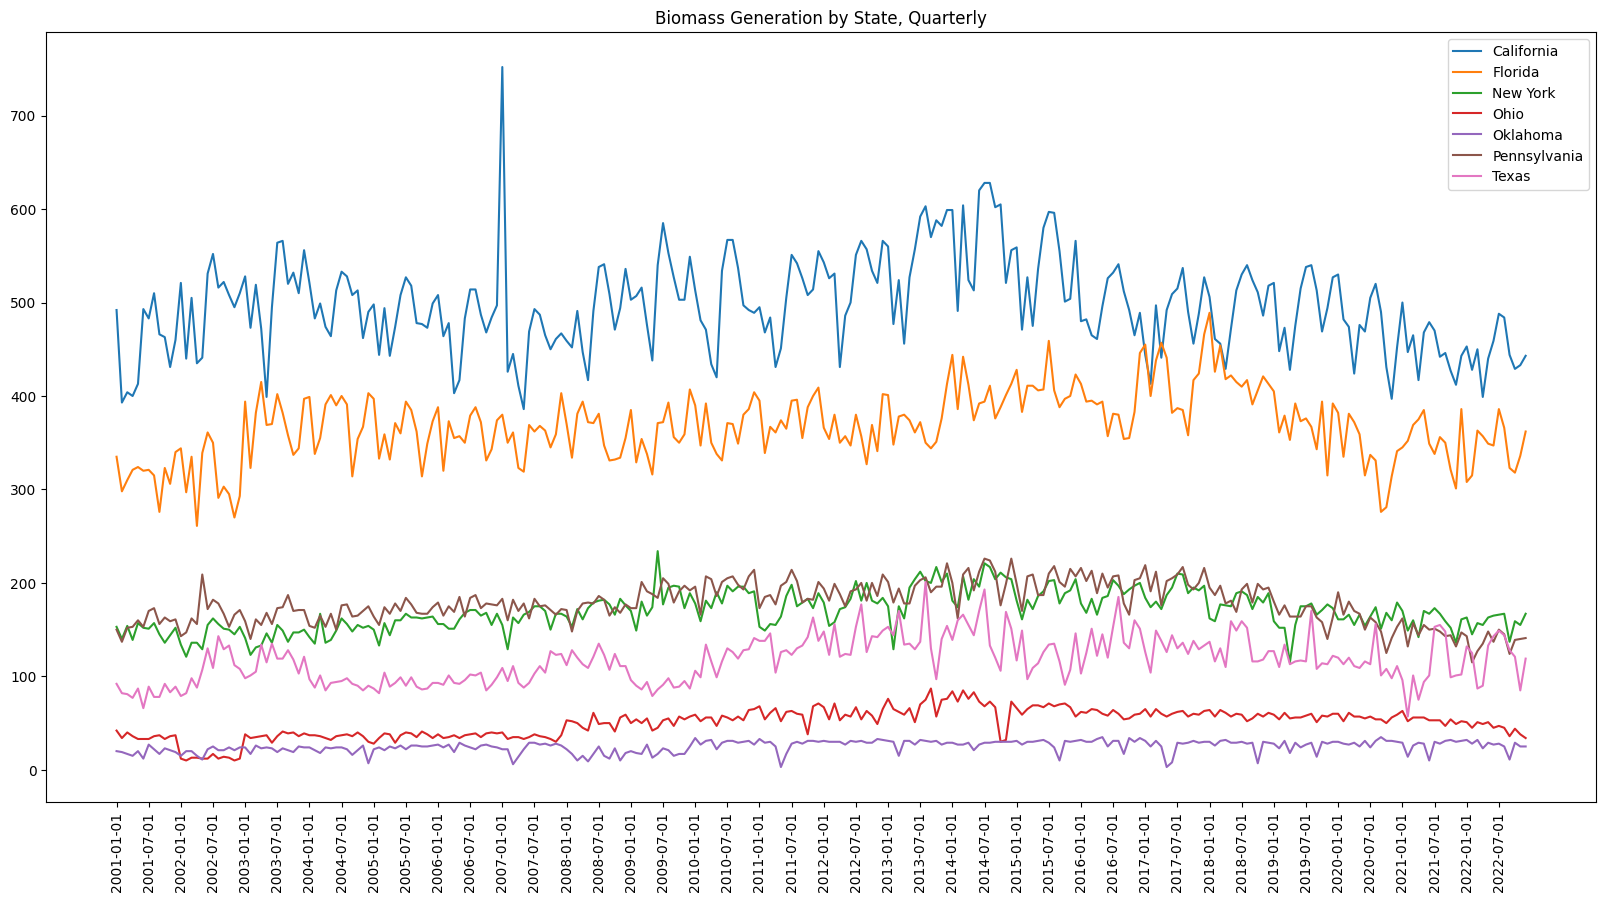

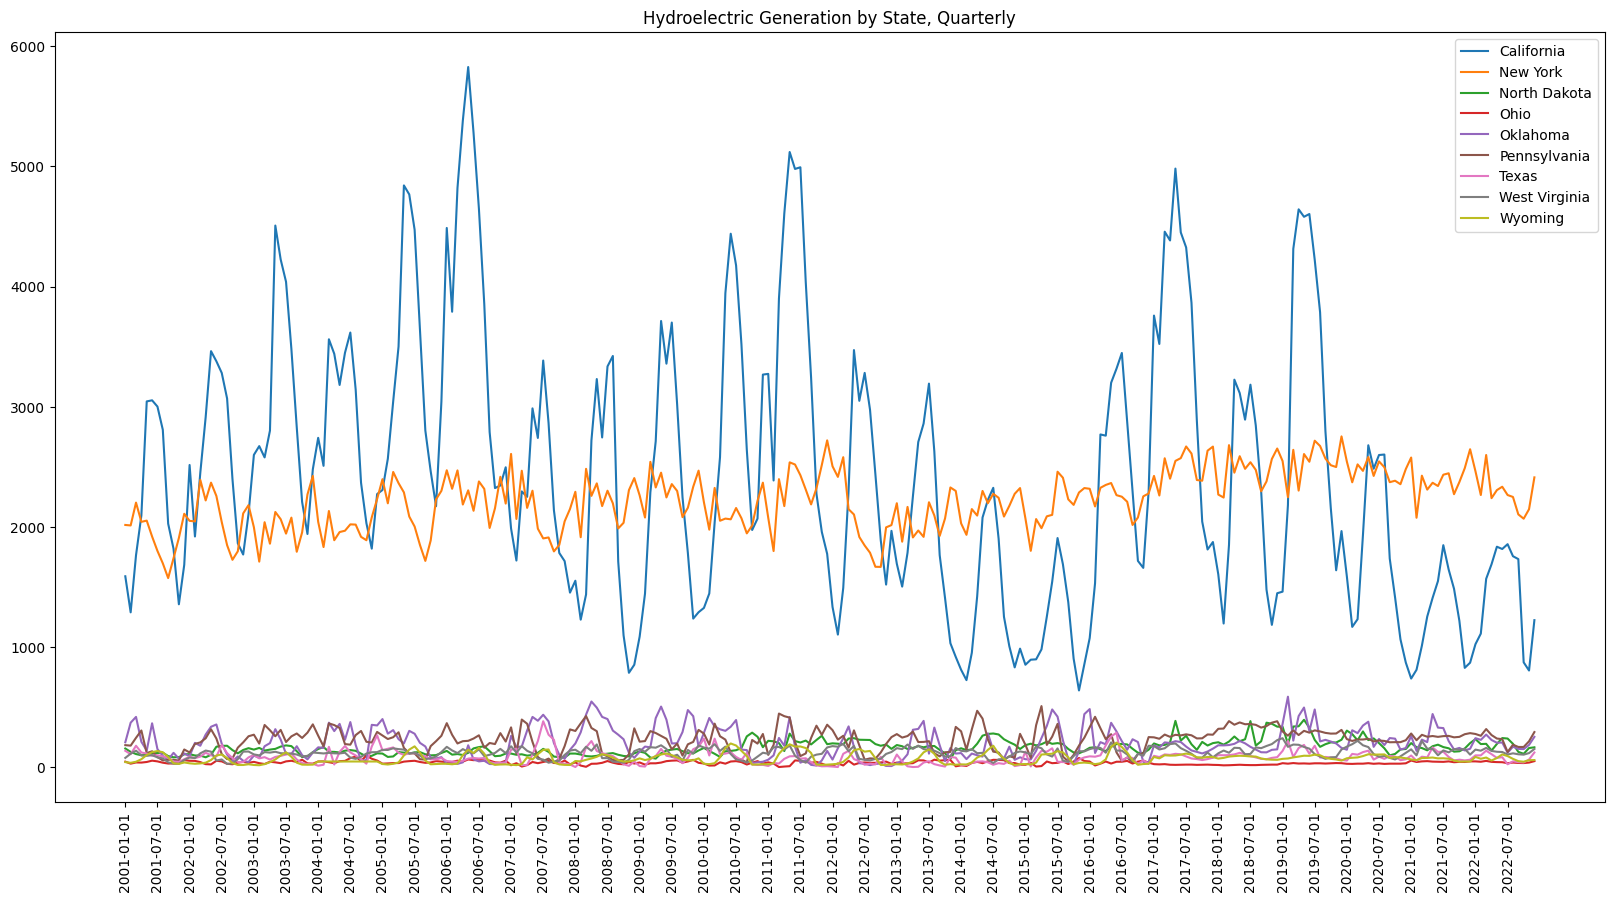

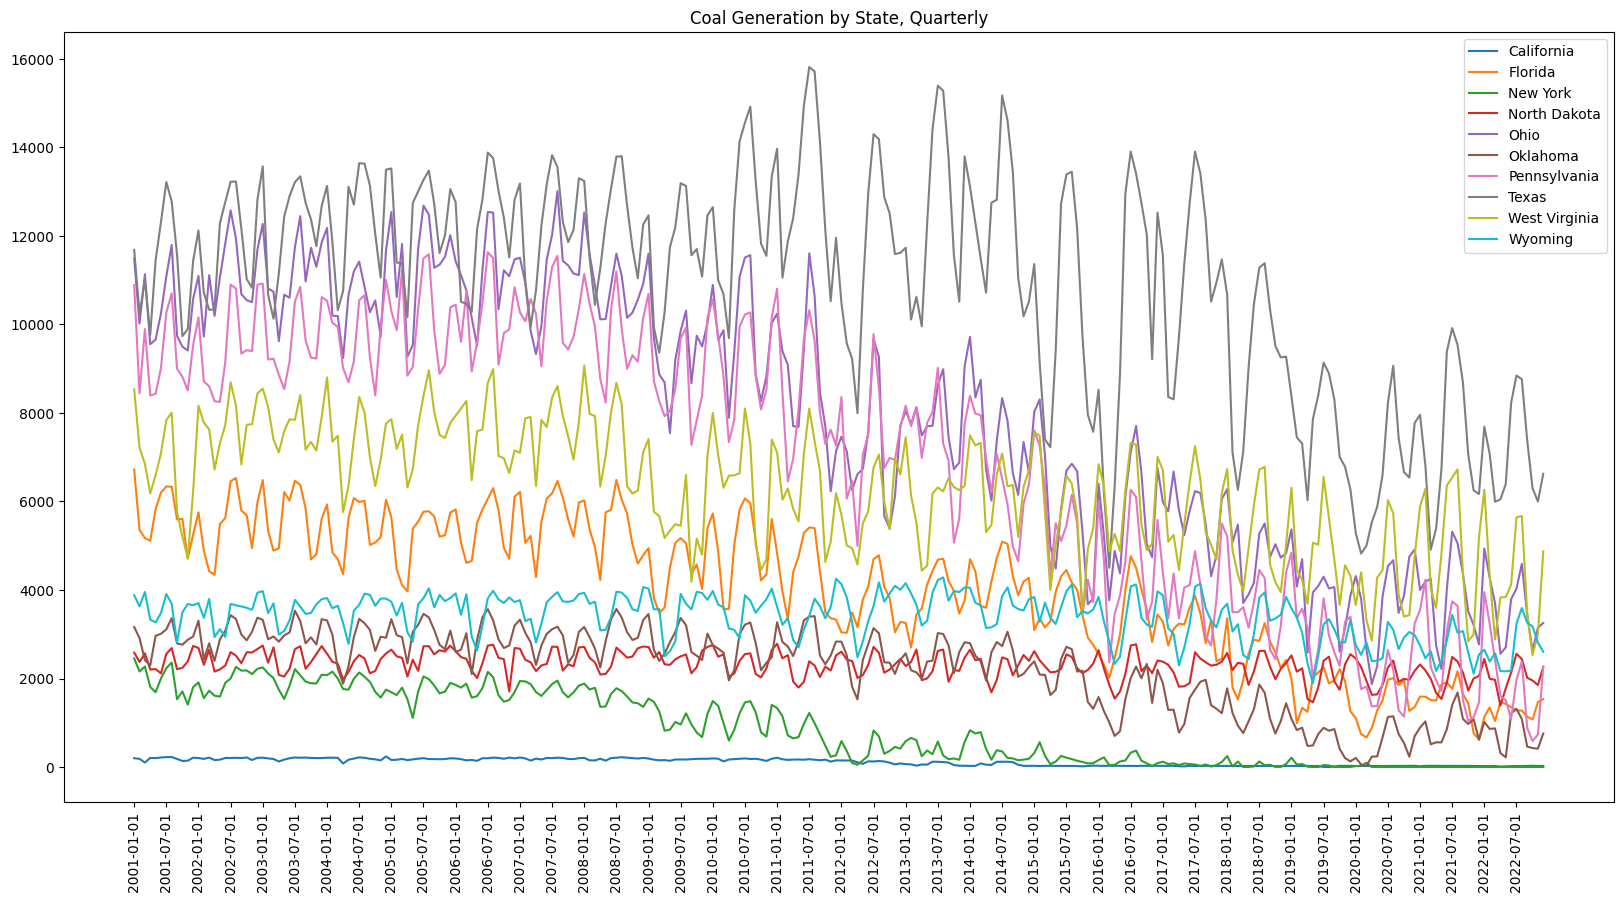

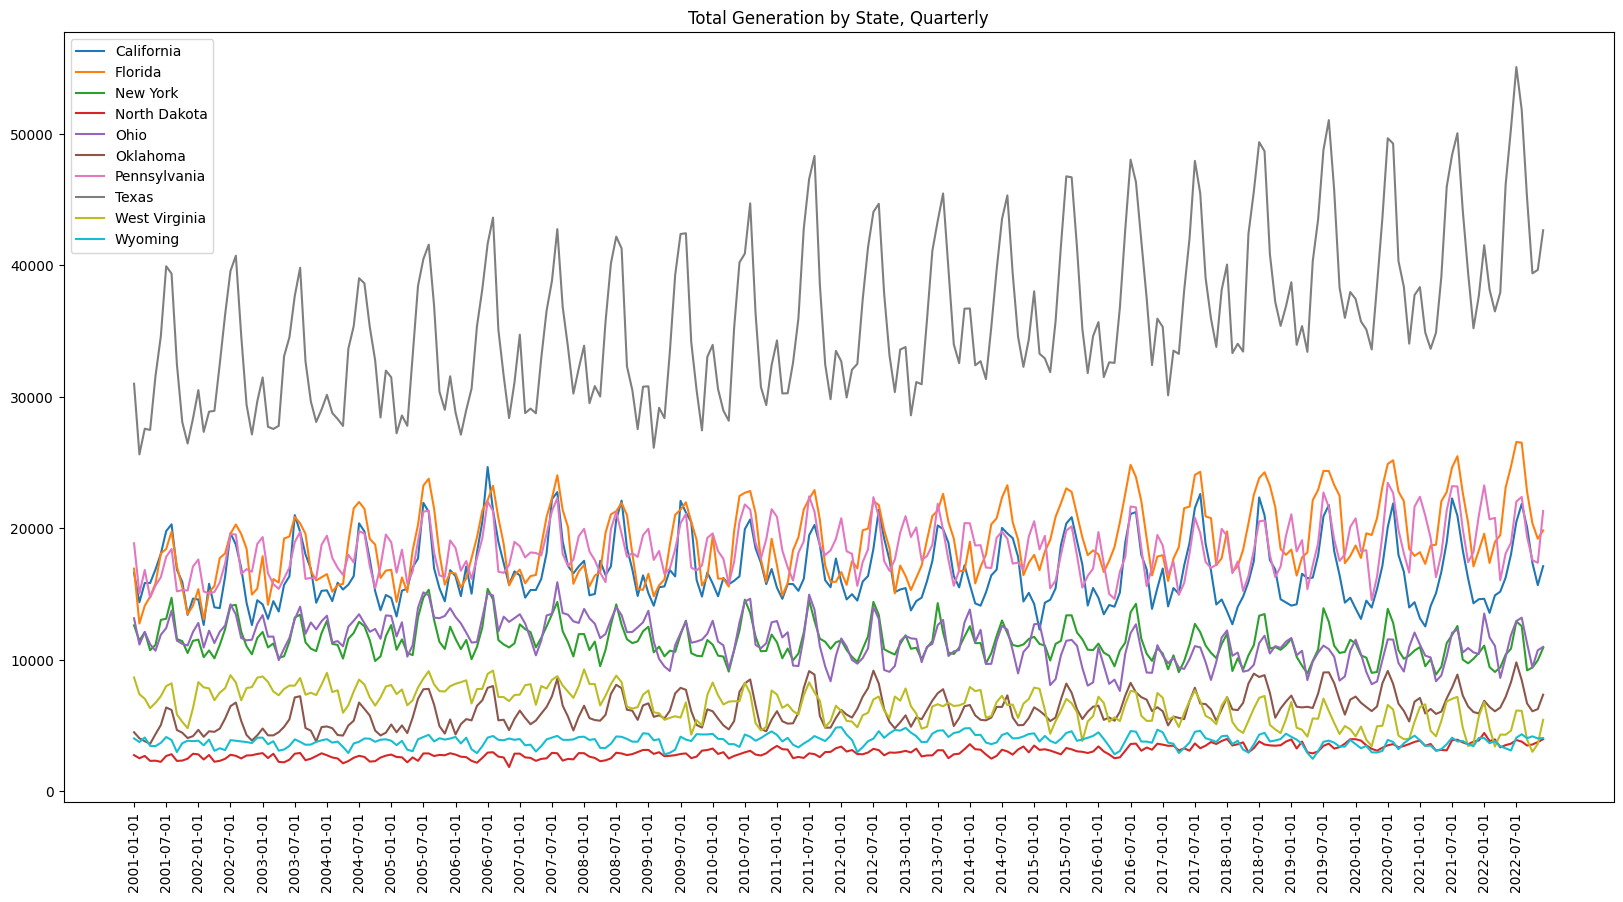

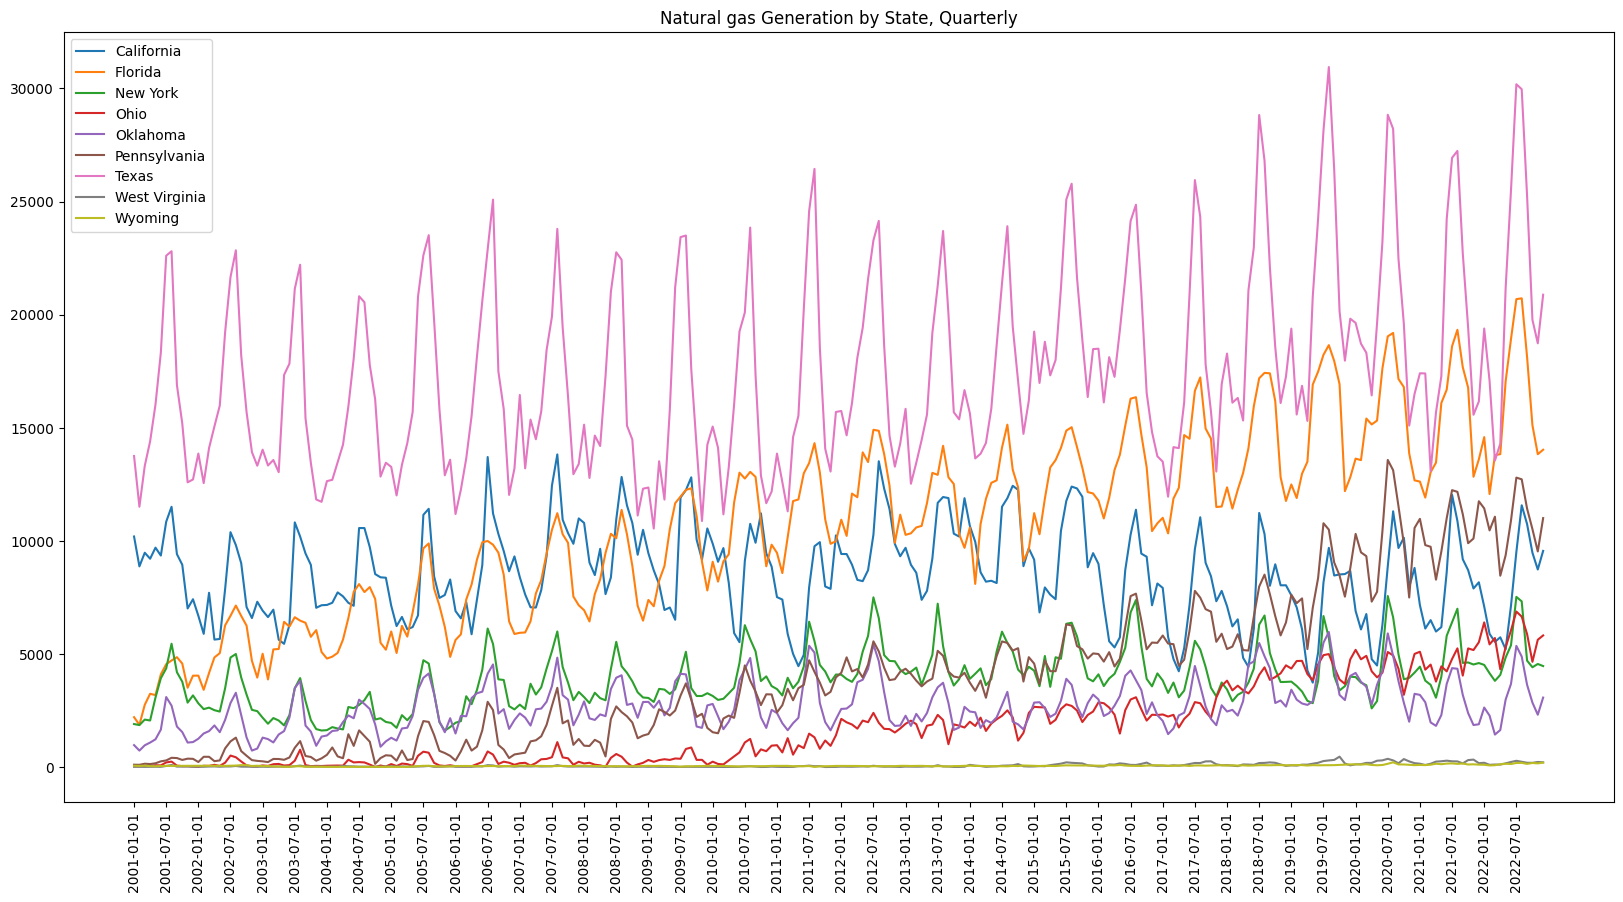

In [46]:
for i, genfile in enumerate(genfiles):

    gen_data = pd.read_csv("clean_data/" + genfile, index_col=0)
    fig, ax = plt.subplots()

    plotstates = gen_data.columns
    plotstates = plotstates[np.isin(plotstates, relevstates)]
    if len(plotstates) == 0:
        for state in gen_data.columns:
            ax.plot(gen_data[state], label=state)
    else:
        for state in plotstates:
            ax.plot(gen_data[state], label=state)
    
    name = genfile.split("_")[1]
    plt.title(name.capitalize() + " Generation by State, Quarterly")

    fig.set_size_inches(20,10)
    ax.tick_params(axis='x', labelrotation=90)
    plt.legend()
    plt.xticks(np.arange(0, len(gen_data.index), 6), gen_data.index[::6])
    plt.savefig("plots/" + name.lower() + "_gen_plot.png")
    plt.show()

#! the solar data is way too incomplete, need to fix

In [25]:
## do per capita by dividing by population over time
##TODO: comparisons between the states are scuffed because of the different scales, need to normalize

population = pd.read_csv("clean_data/clean_population.csv", index_col=0)
population

North Dakota  California     Texas  Pennsylvania  New York   
2000-01-01        641200    33994571  20945963      12285504  18998044  \
2000-02-01        641200    33994571  20945963      12285504  18998044   
2000-03-01        641200    33994571  20945963      12285504  18998044   
2000-04-01        641200    33994571  20945963      12285504  18998044   
2000-05-01        641200    33994571  20945963      12285504  18998044   
...                  ...         ...       ...           ...       ...   
2021-08-01        774948    39237836  29527941      12964056  19835913   
2021-09-01        774948    39237836  29527941      12964056  19835913   
2021-10-01        774948    39237836  29527941      12964056  19835913   
2021-11-01        774948    39237836  29527941      12964056  19835913   
2021-12-01        774948    39237836  29527941      12964056  19835913   

                Ohio  West Virginia  Wyoming  Oklahoma   Florida  
2000-01-01  11363844        1806962   493958   3453943  16047118  
2000-02-01  11363844        1806962   493958   3453943  16047118  
2000-03-01  11363844        1806962   493958   3453943  16047118  
2000-04-01  11363844        1806962   493958   3453943  16047118  
2000-05-01  11363844        1806962   493958   3453943  16047118  
...              ...            ...      ...       ...       ...  
2021-08-01  11780017        1782959   578803   3986639  21781128  
2021-09-01  11780017        1782959   578803   3986639  21781128  
2021-10-01  11780017        1782959   578803   3986639  21781128  
2021-11-01  11780017        1782959   578803   3986639  21781128  
2021-12-01  11780017        1782959   578803   3986639  21781128  

[264 rows x 10 columns]

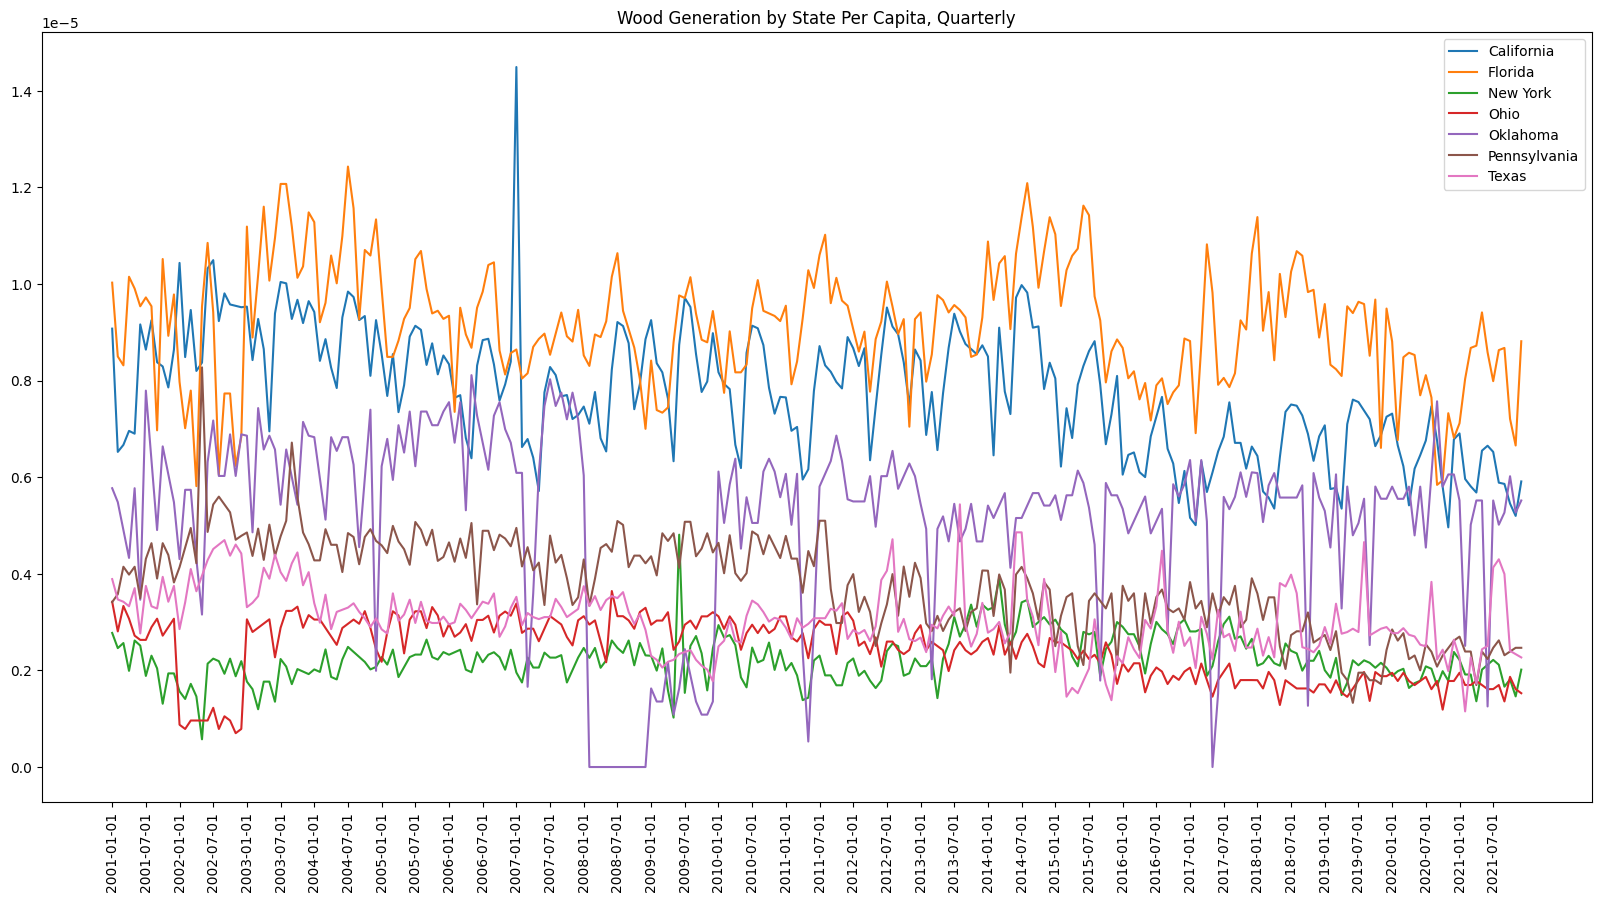

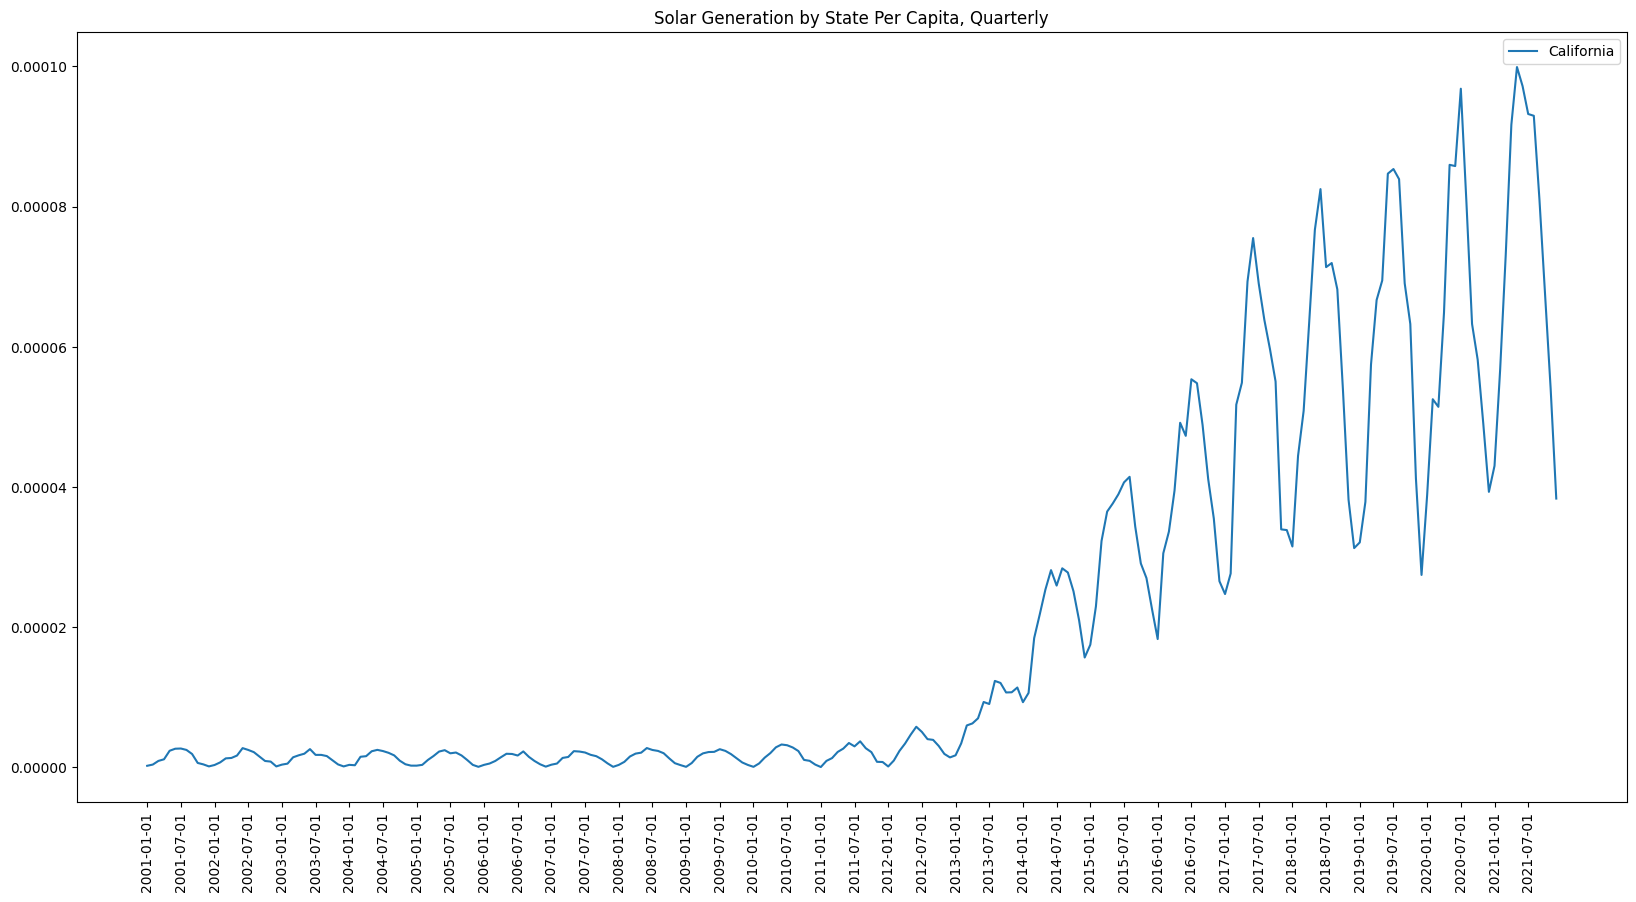

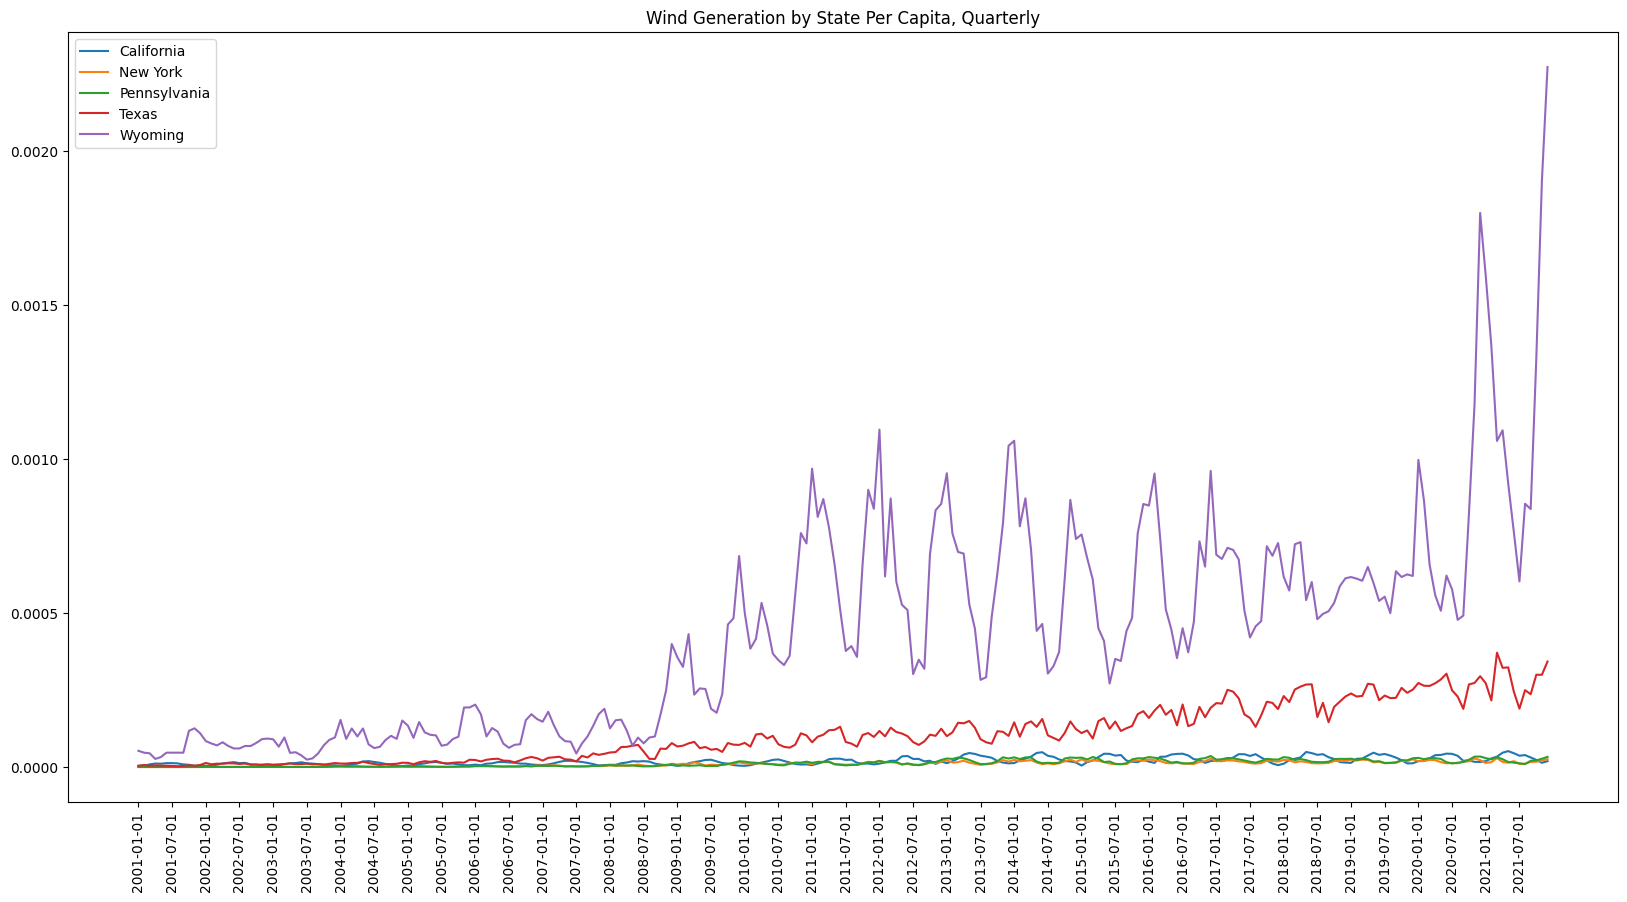

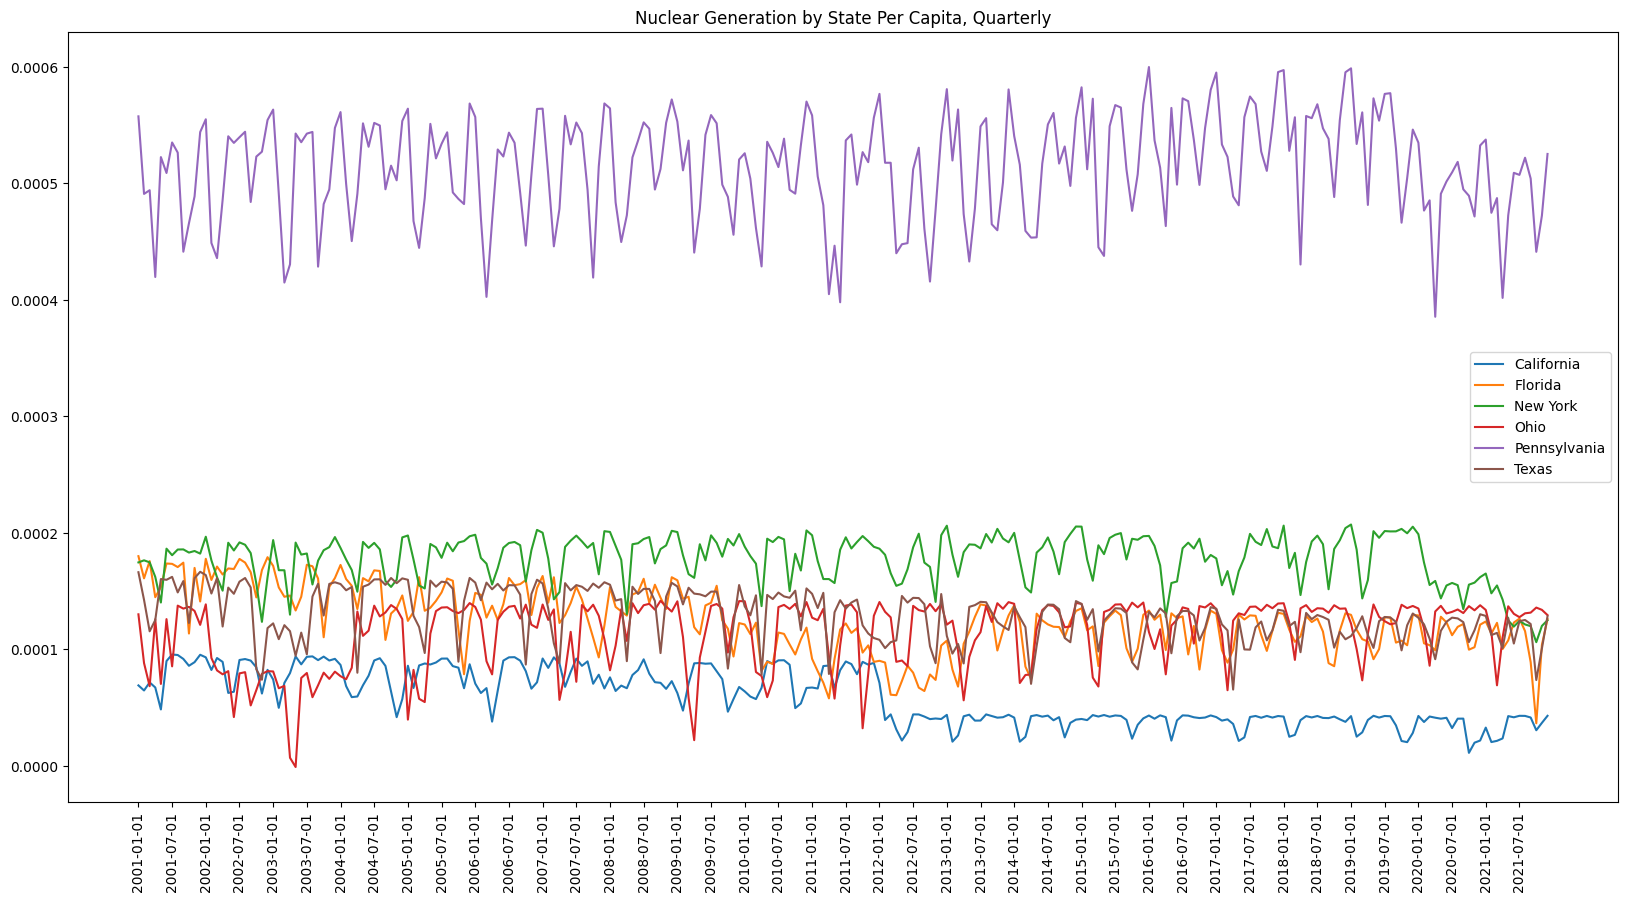

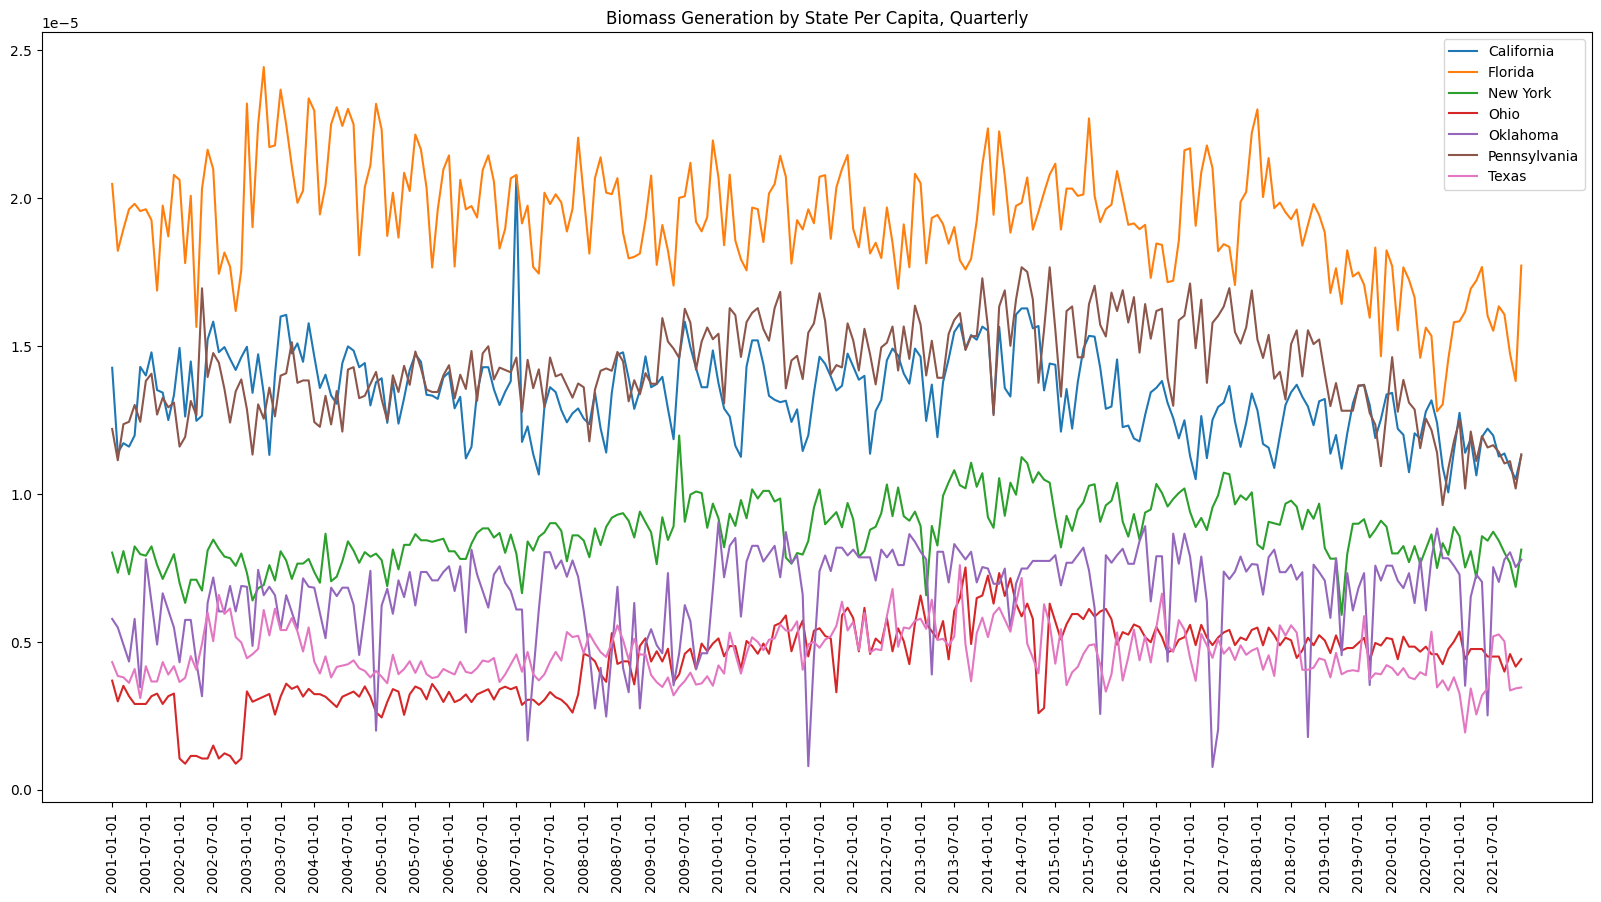

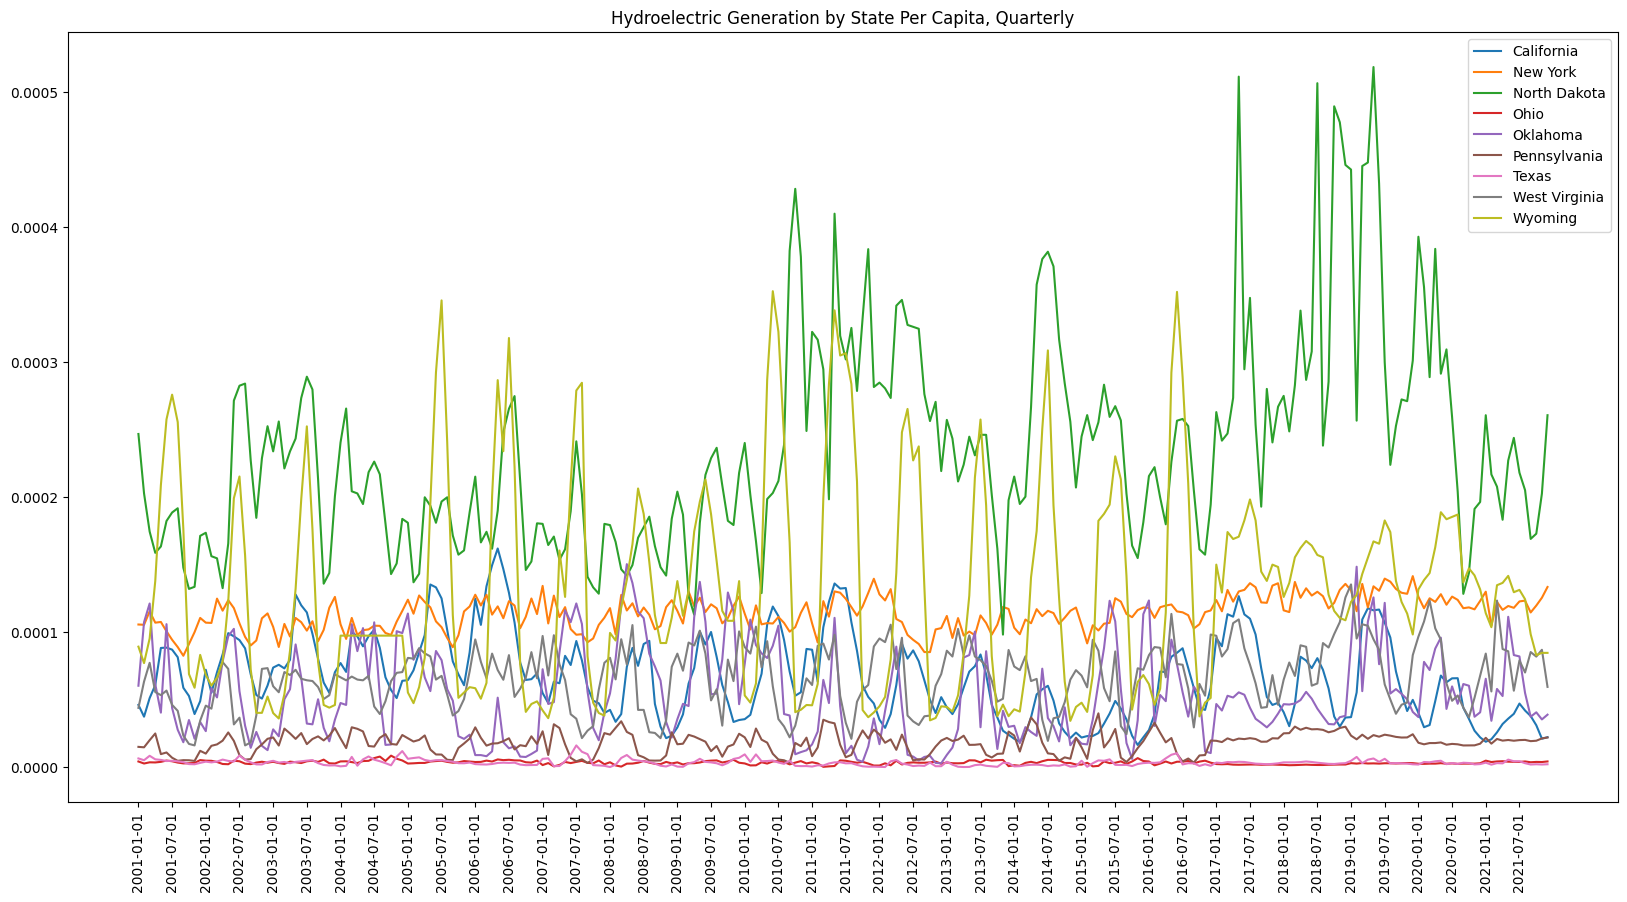

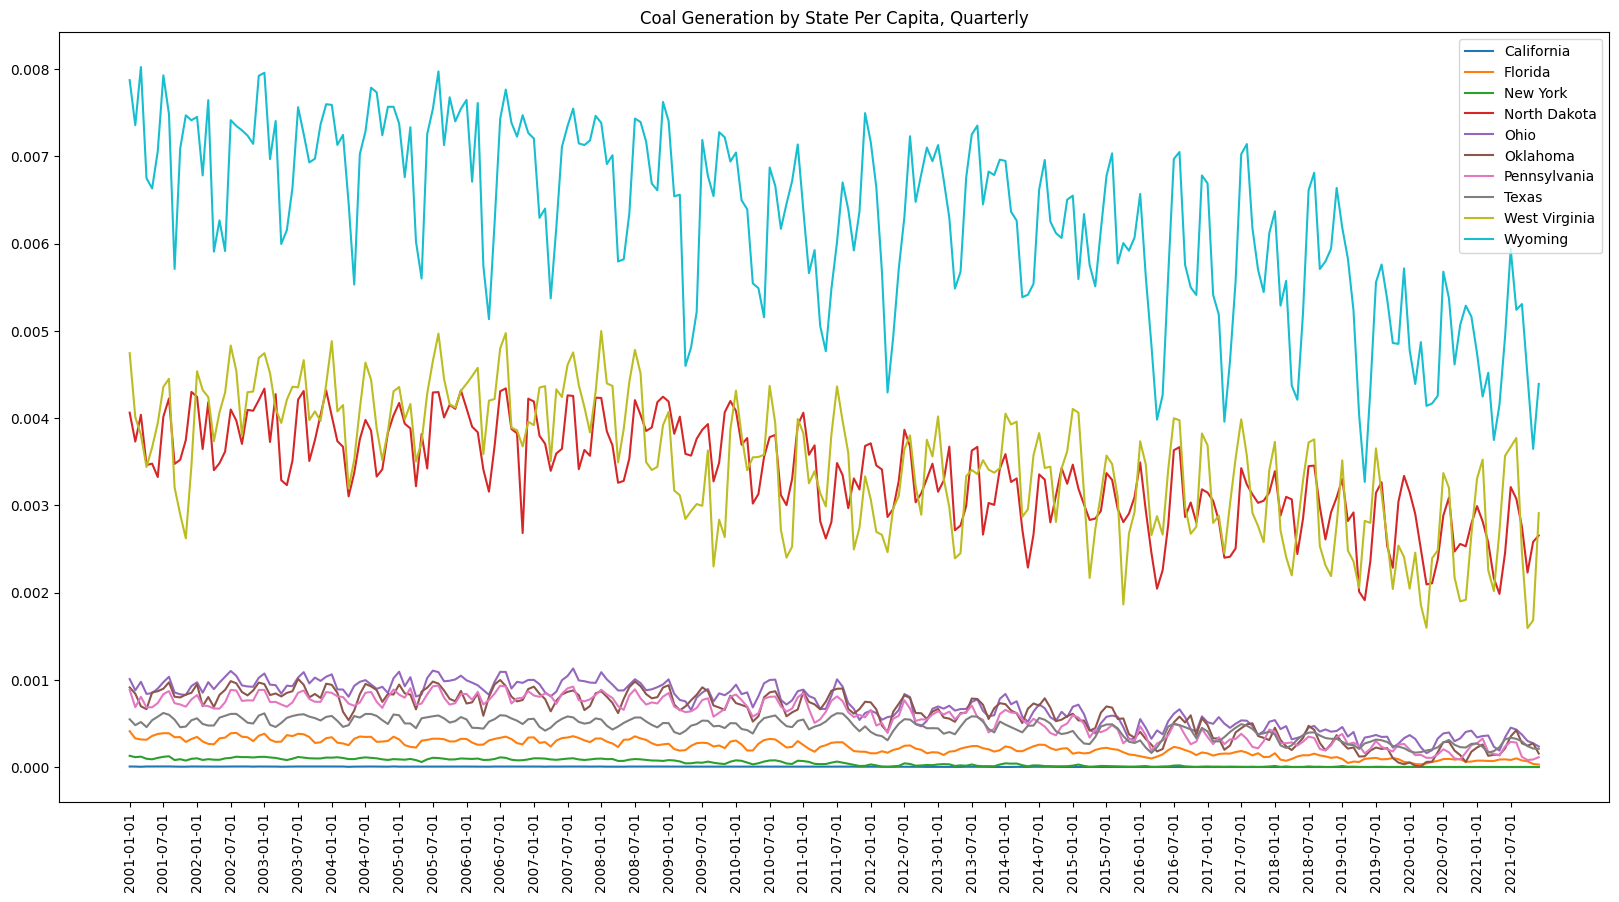

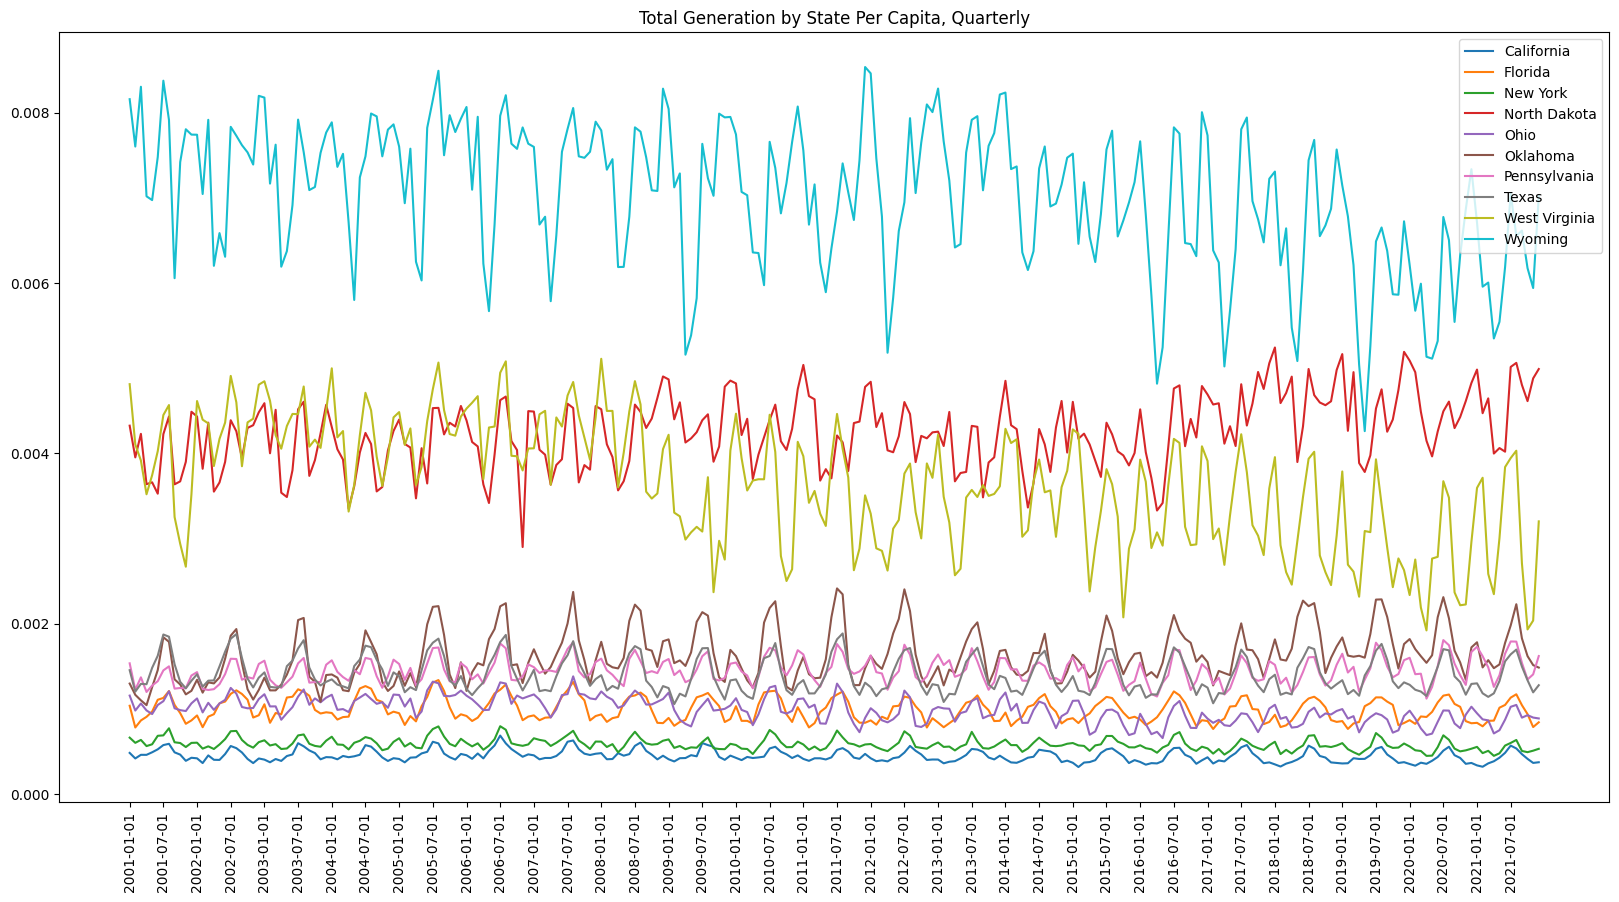

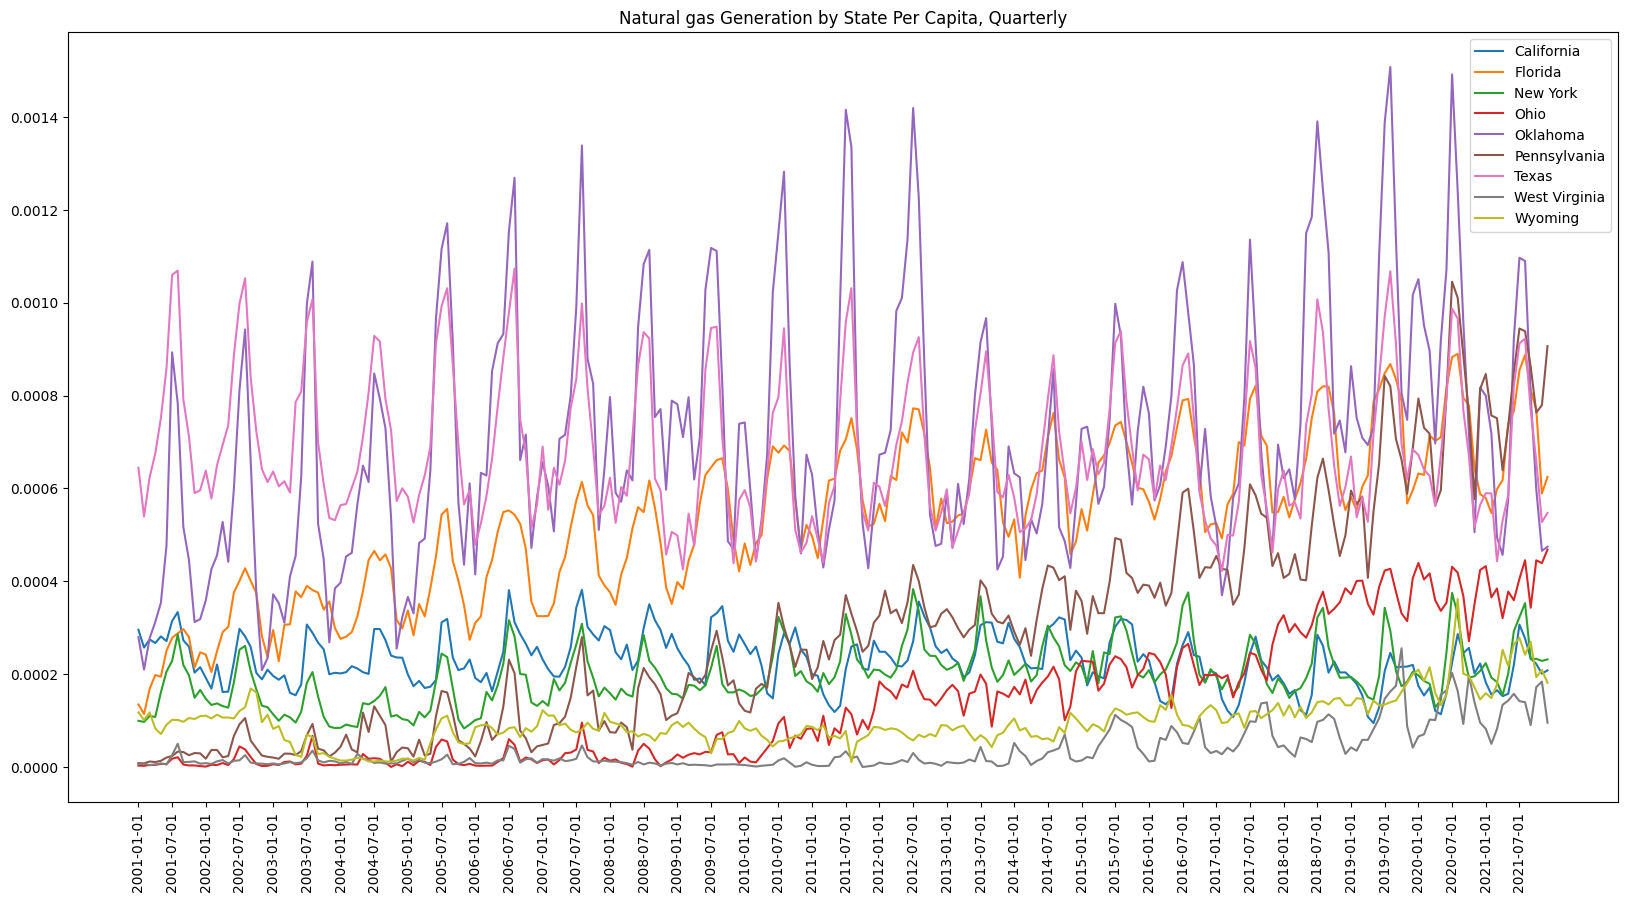

In [47]:
# the per capita graphs look very different!
for i, genfile in enumerate(genfiles):

    gen_data = pd.read_csv("clean_data/" + genfile, index_col=0)
    fig, ax = plt.subplots()

    plotstates = gen_data.columns
    plotstates = plotstates[np.isin(plotstates, relevstates)]


    common_dates = pd.DataFrame(gen_data.index).merge(pd.DataFrame(population.index), how="inner").values.flatten()
    gen_data_percapita = gen_data.loc[common_dates, :].divide(population.loc[common_dates, :])

    if len(plotstates) == 0:
        for state in gen_data_percapita.columns:
            ax.plot(gen_data_percapita[state], label=state)
    else:
        for state in plotstates:
            ax.plot(gen_data_percapita[state], label=state)
    
    name = genfile.split("_")[1]
    plt.title(name.capitalize() + " Generation by State Per Capita, Quarterly")

    fig.set_size_inches(20,10)
    ax.tick_params(axis='x', labelrotation=90)
    plt.legend()
    plt.xticks(np.arange(0, len(gen_data_percapita.index), 6), gen_data_percapita.index[::6])
    plt.savefig("plots/" + name.lower() + "_gen_percapita_plot.png")
    plt.show()


In [ ]:
# Hypothesis: states with higher gas prices will have higher coal consumption and lower renewable energy consumption
# There is a tradeoff between high cost of renewables; coal is cheaper, but has a higher environmental cost
# Using generation, I want to predict electricity sales
# Hypothesis: States that use more renewables end up using more/less electricity?
# More electricity is generated than sold
# Given time series consumption/generation of various fuels, I want to predict how much electricity is sold
# This may be slightly trivial, since you'll generate around how much demand there is


In [61]:
#seasonality analysis
import statsmodels

ModuleNotFoundError: No module named 'statsmodels'